In [1]:
!pip install mdbtools-dev
!apt-get install mdbtools
!pip install pandas pyodbc
!pip install tempfile2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.2/346.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tempfile2: filename=tempfile2-0.1.2-py3-none-any.whl size=2711 sha256=552d9c54da60a315535a7cb304522b6947aaaf1bfc09c30629bc646f390cbdf8
  Stored in directory: /root/.cache/pip/wheels/d8/13/c7/7053b5958dafad5cb95b4e26b0df0dcf6ae3a7aa03fe1a02f9
Successfully built tempfile2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import sys
sys.path.append('/content/drive/MyDrive/Dev/py2/')
import numpy as np

import pandas as pd
from google.colab import files
import os
import subprocess
from io import StringIO  # StringIOを正しくインポート
import model.utility.k_analysis_util as k_a_util
from IPython.display import display
from tqdm import trange

In [11]:

# 使用例
table_name = 'HistoryVariables'  # テーブル名を指定

file_list = [f'kjdb_prediction_cache_{year}.accdb' for year in range(2000, 2025)]
years = range(2000, 2026)

k_a_util.prepare_pd_on_notebook()
print(len(file_list))

dict_statistics={}
for i in trange(len(years)):
  y=years[i]
  filepath = f'/content/drive/MyDrive/Dev/Kjvan/kjdb_prediction_cache_{y}.accdb'
  df_summary = k_a_util.read_table(filepath, table_name)
  columns_to_drop = [ 'hv_horse_id', 'hv_race_no', 'hv_horse_no',
                     'his_sc_l4_p1','his_sc_l4_p2','his_sc_l4_p3','his_sc_l4_p4',
                      'upd']
  df = df_summary.drop(columns=columns_to_drop)
  dict_statistics[y] = df

25


100%|██████████| 26/26 [00:38<00:00,  1.48s/it]


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(dict_statistics, rows, cols, dpi=80):
    """
    指定された辞書の各DataFrameのヒストグラムをプロットする関数です。

    Args:
        dict_statistics: プロット対象のDataFrameを含む辞書。
        rows: グラフの行数。
        cols: グラフの列数。
        dpi: グラフの解像度。

    Returns:
        None
    """
    plt.subplots_adjust(wspace=0.4, hspace=1.0)
    for year, df in dict_statistics.items():
        print(f"{year}")
        # グラフのサイズを指定
        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*4, rows*3), dpi=dpi)

        # 各列のヒストグラムをプロット
        for i, column in enumerate(df.columns):
            ax = axes[i // cols, i % cols]
            df[column].hist(ax=ax, bins=20)  # ヒストグラムのビンの数を調整可能
            ax.set_title(column)

        # グラフのレイアウト調整
        #plt.tight_layout()
        plt.suptitle(f"Histograms for Year {year}", fontsize=14)

        # グラフの保存 (必要に応じて)
        # plt.savefig(f"histograms_{year}.png")
        plt.show()



2022


<Figure size 640x480 with 0 Axes>

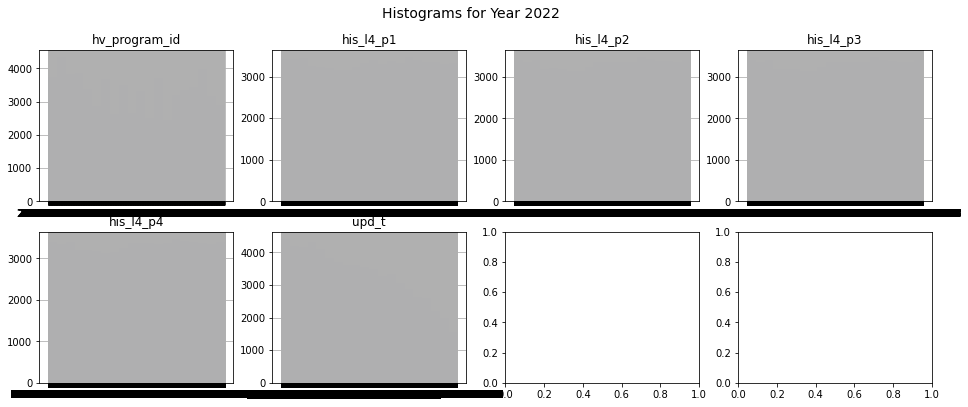

In [13]:
# ヒストグラムの作成 (グラフの行数、列数、解像度を適宜変更)
plot_histograms(dict_statistics, rows=2, cols=4, dpi=72)